In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm
import time

from copy import deepcopy
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold

In [21]:
data_path = 'data_154.xlsx'
label_path = 'label_154.xlsx'

data = pd.read_excel(data_path, index_col=0, sheet_name=0)
label = pd.read_excel(label_path, index_col=0, sheet_name=0)
features = np.array (list(data.columns))

predict = [ 'T1 Letter Number']

negative_idx = np.array ((np.arange(22) + 27).tolist() + (np.arange(48) + 106).tolist())

print(data.head(), label.head())

          mean-1_L_thal-ad  mean-1_L_thal-ak  mean-1_L_thal-awf  \
SubjectN                                                          
HT102             1.146115          0.187892           0.035304   
HT103             1.174811          0.266403           0.070970   
HT105             1.191020          0.269101           0.072415   
HT106             1.291676          0.362108           0.131123   
HT107             1.271981          0.347583           0.120814   

          mean-1_L_thal-eas_De_par  mean-1_L_thal-eas_De_perp  \
SubjectN                                                        
HT102                     0.021227                   0.022265   
HT103                     0.063697                   0.103479   
HT105                     0.062031                   0.082552   
HT106                     0.110743                   0.149738   
HT107                     0.089054                   0.110075   

          mean-1_L_thal-eas_tort  mean-1_L_thal-FA  mean-1_L_thal-ias_Da  

125it [00:00, 455.24it/s]


For np T1 Letter Number, the mean r2 scores for prediction is -0.433244 with std = 0.921710


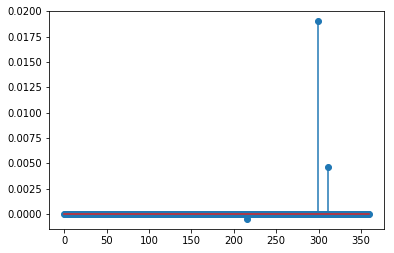

For np T1 Letter Number, the related features are ['3m-CC_Body_mask-rk' '4m-CC_Splenium_mask-rk' 'kut-1_L_thal-rk']


In [29]:

for p in predict:

    X = data.iloc[negative_idx]
    y = (label.iloc[negative_idx])[p]
        
    features = np.array (list(X.columns))
    
    drop = y.notnull()

    X = X[drop]
    y = y[drop]
    
    X = (X.values)
    y = (y.values)
    
    nfold = 5
    nrepeats=25
    kf = RepeatedKFold(n_splits=nfold, n_repeats=nrepeats)
    
    scores = np.zeros([nfold*nrepeats])
    
    a = 0.5
    
    for isplit, Ind in enumerate(tqdm(kf.split(X))):

        # Get the training data in the split
        Itr, Its = Ind

        Xtr = X[Itr]
        ytr = y[Itr]
        Xts = X[Its]
        yts = y[Its]

        regr = Lasso(alpha=a, max_iter=50000)
        regr.fit(Xtr, ytr)
        yhat = regr.predict(Xts)
        scores[isplit] = r2_score(yts, yhat)

    print('For np {0}, the mean r2 scores for prediction is {1:.6f} with std = {2:.6f}'.format(p, np.mean(scores), np.std(scores)))
    
    regr = Lasso(alpha=a, max_iter=50000)
    regr.fit(X, y)

    lasso_coeff = regr.coef_
    # showing the stem graph of lasso coeff
    plt.stem(np.arange(*lasso_coeff.shape), lasso_coeff)
    plt.show()
    
    print('For np {0}, the related features are {1}'.format (p, features[np.nonzero(lasso_coeff)]))

Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Fitting estimator with 100 features.
F

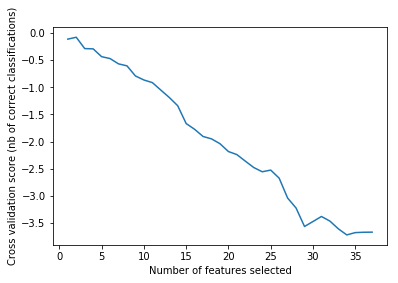

In [3]:
for p in predict:

    X = data
    y = label[p]

    features = np.array (list(X.columns))
    
    drop = y.notnull()

    X = X[drop]
    y = y[drop]
    
    X = (X.values)
    y = (y.values)
    
    nfold = 5
    nrepeats = 2
    
    kf = RepeatedKFold(n_splits=nfold, n_repeats=nrepeats)
    
    model = svm.SVR(C=25, epsilon=0.1, kernel='linear', degree=4, gamma=10, tol=0.001, cache_size=200, max_iter=-1)
    
    rfecv = RFECV(estimator=model, step=10, cv=kf, scoring='r2', verbose=1, n_jobs=-1)
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

In [79]:
scores = np.zeros([nfold*nrepeats])

for isplit, Ind in enumerate(tqdm(kf.split(X))):
    
    # Get the training data in the split
    Itr, Its = Ind
    
    Xtr = X[Itr]
    ytr = y[Itr]
    Xts = X[Its]
    yts = y[Its]
    
    regr = Lasso(alpha=0.005, max_iter=10000)
    regr.fit(Xtr, ytr)
    scores[isplit] = regr.score(Xts, yts)

print('the mean r2 scores for prediction is {0:.6f} with std = {1:.6f}'.format(np.mean(scores), np.std(scores)))

50it [00:04, 12.25it/s]


the mean r2 scores for prediction is 0.984156 with std = 0.110473


In [80]:
regr = Lasso(alpha=0.005, max_iter=10000)
regr.fit(X, y)

lasso_coeff = regr.coef_

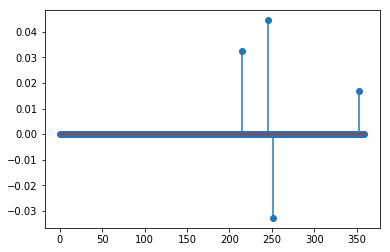

In [81]:
plt.stem(np.arange(*lasso_coeff.shape), lasso_coeff)
plt.show()

In [97]:
print('the only related features are {}'.format (features[np.nonzero(lasso_coeff)]))

the only related features are ['3m-CC_Body_mask-rk' '4m-1_L_thal-eas_tort' '4m-1_L_thal-rk'
 'kut-CC_Splenium_mask-eas_tort']


In [39]:
def greedy_forward_SVM(F, y, num_feature, num_selected, num_repeats, num_test, C_val, Gamma_val, eps_val):
    '''
    Args:
        F: data
        y: label
        num_feature: number of feature in total. should be 120 but only 100
        num_selected: number of feature selected
        num_repeats: iter of repeat to avoid noise
        num_test: number of test sample
        C_val: c value as SVM hypter parameter
        Gamma_val: gamma value as SVM hyper parameter
        eps_val: eplison value as SVM hyper parameter
    '''
    best_acc_featsize = np.zeros((num_feature,))  ### accuracy with best subset of different sizes
    all_feat_remained = np.arange(num_feature)
    feat_order = list()

    num_samples = F.shape[0]

    for i in range(num_selected):  ## adds one feature per step
        # iterating through all possible i

        train_acc_cur = np.zeros((len(all_feat_remained), num_repeats))
        test_acc_cur = np.zeros((len(all_feat_remained), num_repeats))
        train_acc_avg = np.zeros((len(all_feat_remained),))
        test_acc_avg = np.zeros((len(all_feat_remained),))
        # print("%d-th feature selection" % ( i+1) )

        for j in range(len(all_feat_remained)):  ## selects one feature out of the remaining ones

            cur_feat_list = deepcopy(feat_order)
            cur_feat_list.append(all_feat_remained[j])
            X = F[:, cur_feat_list]
            # print("%d-th feature selection and feature list= [%s]" % ( i+1, ', '.join(map(str, cur_feat_list))))

            for iter in range(num_repeats):
                # print("%d-th feature selection and %d-th iteration and feature list= [%s]" % ( i+1, iter+1,', '.join(map(str, cur_feat_list))))

                np.random.seed(3 * iter + 10)
                inds = np.random.choice(len(y), num_test)

                X_test = X[inds, :]
                y_test = y[inds]
                X_train = np.delete(X, inds, 0)
                y_train = np.delete(y, inds)

                clf = svm.SVR(C=C_val, epsilon=eps_val, kernel='rbf', degree=4, gamma=Gamma_val, tol=0.001,
                              cache_size=200, max_iter=-1)
                clf.fit(X_train, y_train)
                predicted_train_labels = clf.predict(X_train)
                train_score = clf.score(X_train, y_train)
                # train_error= sum( [1. for k in pred_diff_train if k != 0])/len(predicted_train_labels)
                train_acc_cur[j, iter] = train_score
                predicted_test_labels = clf.predict(X_test)
                test_score = clf.score(X_test, y_test)
                # test_error= sum( [1. for k in pred_diff_test if k != 0])/len(predicted_test_labels)
                test_acc_cur[j, iter] = test_score
                # print("%d-th feature, current list [%s], and its acc= %f" % ( j+1, ', '.join(map(str, cur_feat_list)), test_acc_cur[ j, iter] ))

        for k in range(len(all_feat_remained)):
            train_acc_avg[k] = np.mean(train_acc_cur[k, :])
            test_acc_avg[k] = np.mean(test_acc_cur[k, :])

        best_acc_featsize[i] = np.max(test_acc_avg)
        best_testacc_ind = np.unravel_index(test_acc_avg.argmax(), test_acc_avg.shape)
        feat_order.append(all_feat_remained[best_testacc_ind])
        # print(" current best feature index= %d" %  (all_feat_remained[best_testacc_ind]) )

        all_feat_remained = np.delete(all_feat_remained, best_testacc_ind, 0)

    return feat_order, best_acc_featsize

In [40]:
X = data.iloc[negative_idx]
y = (label.iloc[negative_idx])[ 'T1 Letter Number']

features = np.array (list(X.columns))

drop = y.notnull()

X = X[drop]
y = y[drop]

X = (X.values)
y = (y.values)

In [41]:
start_time = time.time()

num_feature = X.shape[1]
num_test = 20
num_repeats = 25  ## shows number of times we shuffle the data and test on testing
train_accuracies = [0] * num_repeats
test_accuracies = [0] * num_repeats

tot_num = X.shape[0]

num_selected = 10
eps = 0.025

# C_range = np.logspace(-3, 3.0, num=5)
# gamma_range = np.logspace(-5, 4, 5)

C_range = np.array([27.826])
gamma_range = np.array([10])

test_acc_all = np.zeros((C_range.shape[0], gamma_range.shape[0], num_feature))
selected_feat = np.zeros((C_range.shape[0], gamma_range.shape[0], num_selected))

print("Start")
for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        a1, a2 = greedy_forward_SVM(X, y, num_feature, num_selected, num_repeats, num_test, C_range[i], gamma_range[j],
                                    eps)
        a3 = np.asarray(a1)
        test_acc_all[i, j, :] = a2
        selected_feat[i, j, :] = a3
        print("(", C_range[i], ",", gamma_range[j], ") value of (C, Gamma), and best feat indices=", a3)

max_ind = np.unravel_index(test_acc_all.argmax(), test_acc_all.shape)
print("maximum test accuracy= %.3f, achieved by using %d features and ( C, Gamma)= ( %.3f, %.3f) from 14 metrics" % (
test_acc_all[max_ind], max_ind[2] + 1, C_range[max_ind[0]], gamma_range[max_ind[1]]))
print("Selected feature for 3xiter=", selected_feat[max_ind[0], max_ind[1], 0:max_ind[2] + 1])
print(features[np.array(selected_feat[max_ind[0], max_ind[1], 0:max_ind[2] + 1], dtype=np.int)])
# print("\nMaximum Train Accuracy with 100 iteration: %f " % np.max(train_acc_all), "%")
# print("\nMaximum Test Accuracy: %f, by feature indices= %s " % ( np.max(test_acc_avg), subset_indices[best_testacc_ind[0]] ) )

# print("\nall accuracies:", test_acc_avg)

end_time = time.time()
tot_time = end_time - start_time
print("total time=", tot_time)


Start
( 27.826 , 10 ) value of (C, Gamma), and best feat indices= [150 294 297  72 295 265  56 272 285  80]
maximum test accuracy= 0.328, achieved by using 10 features and ( C, Gamma)= ( 27.826, 10.000) from 14 metrics
Selected feature for 3xiter= [150. 294. 297.  72. 295. 265.  56. 272. 285.  80.]
['2m-CC_Body_mask-FA' '4m-CC_Splenium_mask-FA' '4m-CC_Splenium_mask-mk'
 'std-2_R_thal-ad' '4m-CC_Splenium_mask-ias_Da' '4m-CC_Body_mask-ak'
 'mean-CC_Splenium_mask-md' '4m-CC_Body_mask-md' '4m-CC_Genu_mask-mk'
 'std-2_R_thal-md']
total time= 151.49968814849854
